## <center> Mathematical Model of PI - controller </center>
The model is based on discrete form  of differential equations

The inspiration has been taken from: [Industrial IT and Automation Channel](https://www.youtube.com/watch?v=Hxx0k752LBA&t=2950s&ab_channel=IndustrialITandAutomation)

Very useful resource to write formulas with Markdown: [Mathematics in Markdown](https://rpruim.github.io/s341/S19/from-class/MathinRmd.html)

[HTML Color Picker](https://htmlcolorcodes.com/)

The mathematical model of the system to be controlled by PI - controller is the following differential equation:
$$\frac{\partial y}{\partial t} = ay + bu \tag{1}$$

The mathematical model of the PI - controller is represented as the following differential equation:
$$u(t) = K_{p}e + \frac{K_{p}}{T_{i}} \int_{0}^{t} e \, d\tau \tag{2}$$


<img src="StructureScheme.jpg" width="30%" height="auto" style="position:relative; left:400px"/>

Applying Euler Backward Discretization to differential equation will result:
$$\frac{\partial y}{\partial t} \approx \frac{x(k) - x(k-1)}{T_{s}}, \tag{3}$$

Where $T_{s}$ is sampling time and $k$ is current iterration.

Let's derive both side of PI - controller equation ($u(t) = K_{p}e + \frac{K_{p}}{T_{i}} \int_{0}^{t} e \, d\tau $):
$$\frac{\partial u}{\partial t} = K_{p}\frac{\partial e}{\partial t} + \frac{K_{p}}{T_{i}} e \tag{4}$$

Applying the statement $(3)$ to the equation $(4)$ resulting in the following:

$$\frac{u_{k} - u_{k-1}}{T_{s}} = K_{p}\frac{e_{k} - e_{k-1}}{T_{s}} + \frac{K_{p}}{T_{i}} e_{k} \tag{5}$$

After some simplifications final equation that represents the discrete form of differential equation for PI - controller is:

$$u_{k} = u_{k-1} + K_{p}(e_{k} - e_{k-1}) + \frac{K_{p}T_{s}}{T_{i}} e_{k}, \tag{6}$$

Where $e_{k} = r_{k} - y_{k}$ is error of control.

Applying the same approach that was used for discretization differential equation of PI - contoller to differential equation of system to be controlled ($\frac{\partial y}{\partial t} = ay + bu$) will result:
$$\frac{y_{k} - y_{k-1}}{T_{s}} = ay_{k} + bu_{k}\tag{7}$$
$$y_{k} - y_{k-1} = ay_{k}T_{s} + bu_{k}T_{s} \tag{8}$$
$$y_{k} = y_{k-1} + ay_{k}T_{s} + bu_{k}T_{s} \tag{9}$$
$$y_{k+1} = (1 + aT_{s})y_{k} + bu_{k}T_{s} \tag{10}$$

## <span style="color:#FF0303">TODO:</span> 
- Figure out differantial equation for $1^{st}$ order process to be sure the equation ($10$) makes sense
- Learn [Ziegler-Nichols PID tuning method](https://en.wikipedia.org/wiki/Ziegler%E2%80%93Nichols_method)
- Check out the simulation of the rocket controlled by PID that is tuned using Ziegler-Nichols method. There is a
kind of visualisation made by using Turtle lib [Git repo](https://github.com/Jmack66/PIDtest) of the project.


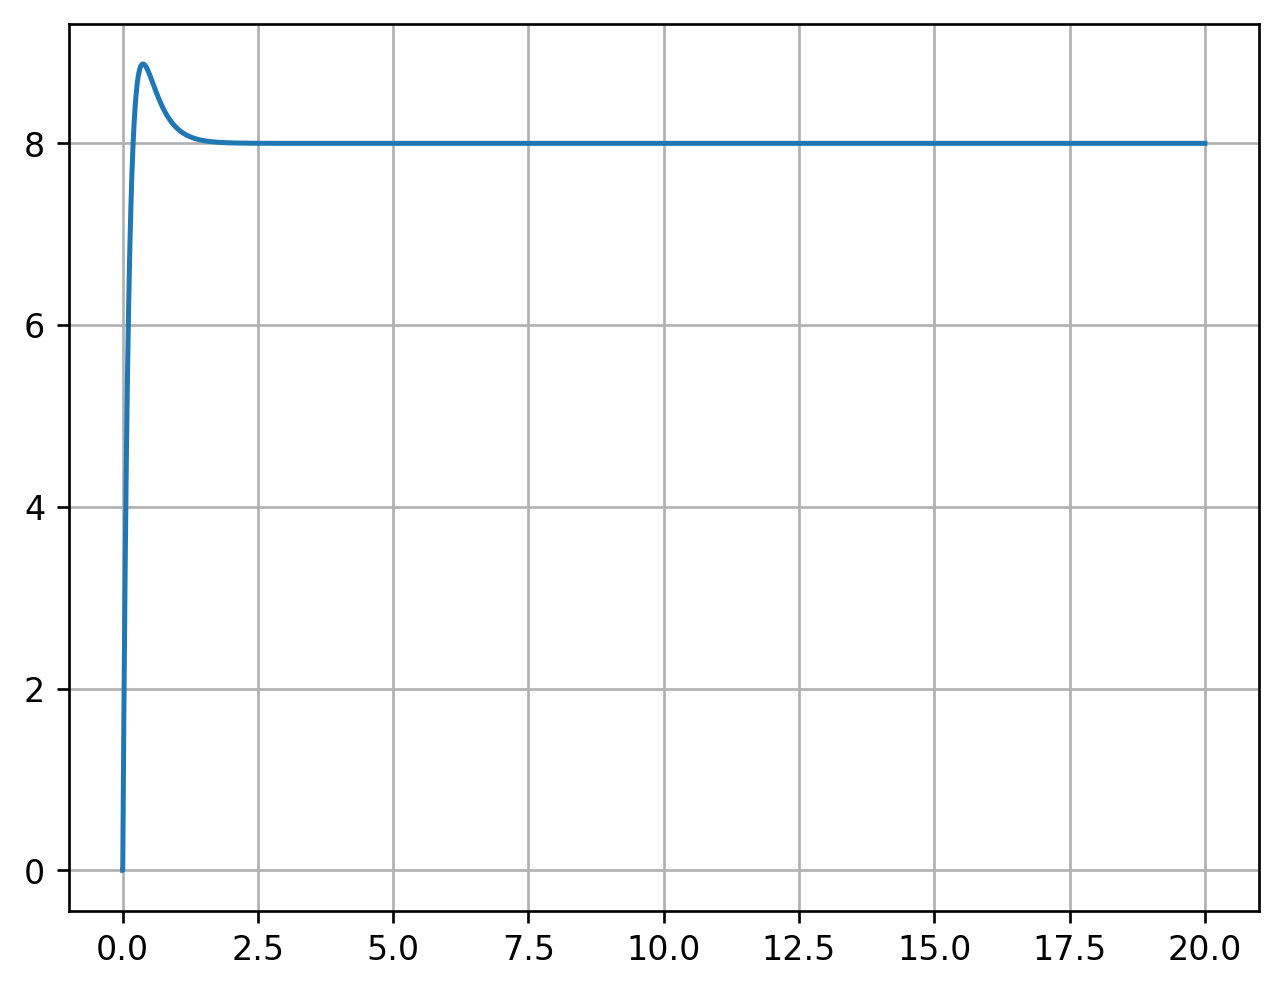

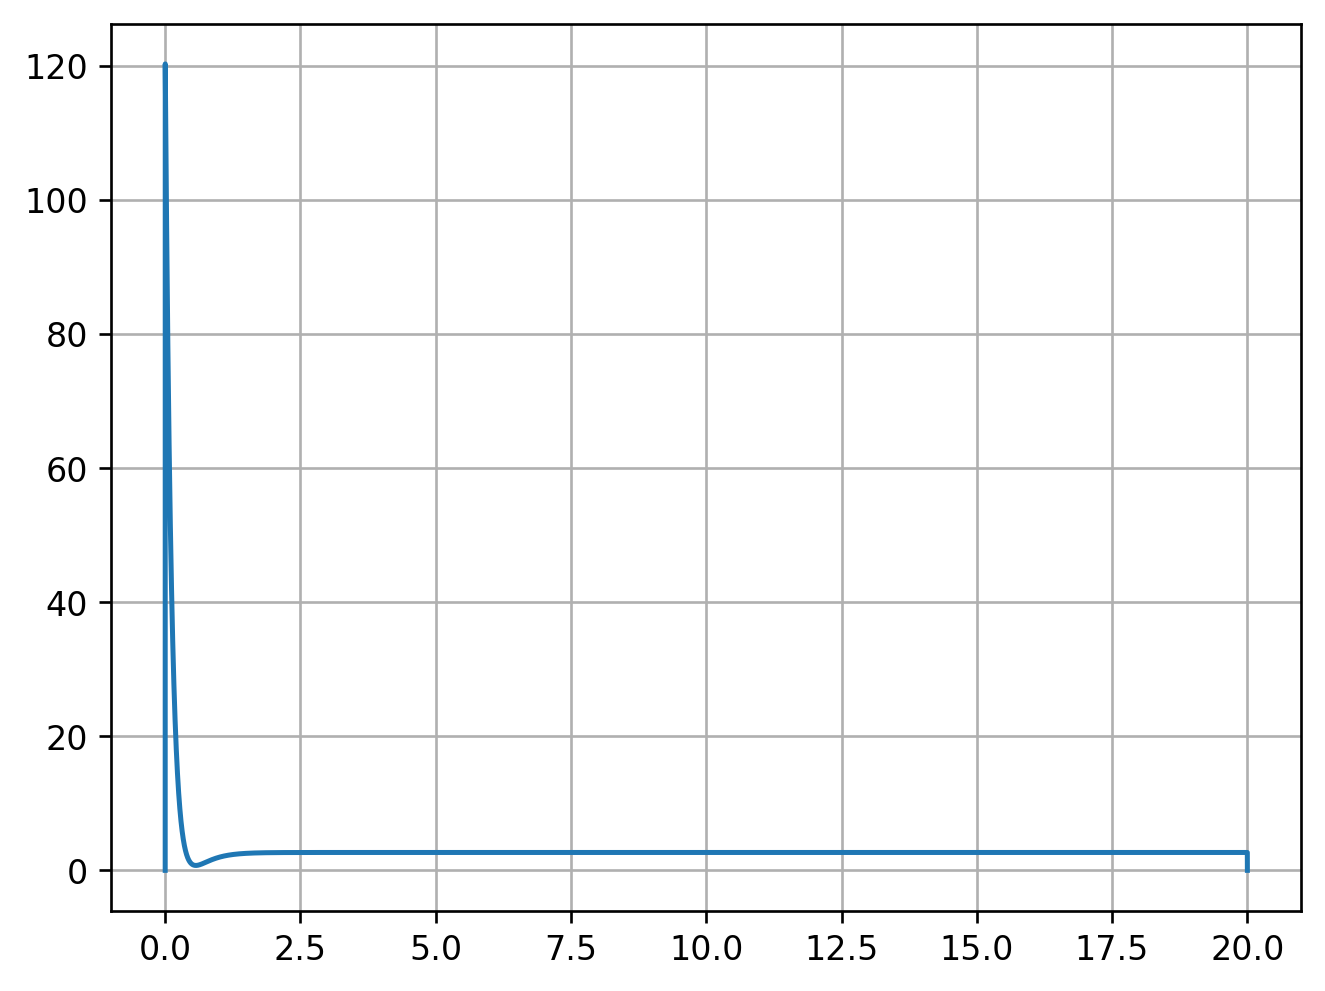

In [31]:
import numpy as np
#%matplotlib inline
# %matplotlib
import matplotlib.pyplot as plt


from IPython.display import display, Math
from sympy import latex, symbols, diff
from sympy import init_session 


# Parameters of system is to be controlled
K = 3 # this is a gain of PI - controller
T = 4 # this is a time constant of I - term

a = -(1/T)
b = K/T

# PI - controller settings
Kp = 15
Ti = 0.4

# Reference value
r = 8

# Simulation parameters
Ts = 0.001 # sampling time
Tstop = 20 # end of simulation time
N = int(Tstop/Ts) # number of sampling
y = np.zeros(N+2) # output vector
y[0] = 0 #initial value

e = np.zeros(N+2) # errors vector
u = np.zeros(N+2) # PI - controller output vector

for k in range(1,N+1):
    e[k] = r - y[k]
    u[k] = u[k-1] + Kp*(e[k] - e[k-1]) + Ts*(Kp/Ti)*e[k]
    y[k+1] = (1 + Ts*a)*y[k] + Ts*b*u[k]
    # y[k] = (y[k-1] + Ts*b*u[k]) / (1 + a*Ts)
    # y[k+1] = (1 + Ts*a)*y[k] + Ts*b*u[k]
    # y[k] = (y[k-1] + b*u[k]*Ts) / (1 - a*Ts)


t = np.arange(0, Tstop + 2*Ts, Ts) # time vector

plt.figure(1,dpi=240)
plt.plot(t,y)
plt.grid()


plt.figure(2, dpi=240)
plt.plot(t,u)
plt.grid()

#to plot the chart in external window with zoom option available
# %matplotlib

# to plot the chart in jupyter notebook
%matplotlib inline
